In [16]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn import linear_model
import xlrd
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

#suppress annoying hartmless errors
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [17]:
loc = ("/Users/jakegrosek/Desktop/thinkful_py/Unit_2/nyc_crime.xls")
df = pd.read_csv("nyc_crime.csv")

In [18]:
# instantiate
regr = linear_model.LinearRegression()


In [19]:
#made this # to check if naming columns again created issues
#df.columns = ['City', 'Population', 'Violent crime', 'Murder and nonnegligent manslaughter', 
              #'Rape (revised definition)1', 'Rape (legacy definition)2', 'Robbery', 
             #'Aggravated assault', 'Property crime', 'Burglary', 'Larceny-theft', 'Motor vehicle theft', 'Arson3']

In [20]:
#no longer needed 
#df.rename(columns={'City': 'City', 'Population': 'Population', 'Violent crime': 'Violent crime',
                  #'Murder and nonnegligent manslaughter': 'Murder', 'Rape (revised definition)1': 'Rape1',
                  # 'Rape (legacy definition)2': 'Rape2','Robbery': 'Robbery', 'Aggravated assault': 'Aggravated', 
                  # 'Property crime': 'Property', 'Burglary': 'Burglary', 'Larceny-theft': 'Larceny', 
                  # 'Motor vehicle theft': 'Motor','Arson3': 'Arson'}, inplace=True)

In [21]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')


In [22]:

df['population'] = pd.to_numeric(df['population'], errors='coerce')
df['violent crime'] = pd.to_numeric(df['violent_crime'], errors='coerce')
df['murder_and_nonnegligent_manslaughter'] = pd.to_numeric(df['murder_and_nonnegligent_manslaughter'], errors='coerce')
df['rape_revised_definition1'] = pd.to_numeric(df['rape_revised_definition1'], errors='coerce')
df['rape_legacy_definition2'] = pd.to_numeric(df['rape_legacy_definition2'], errors='coerce')
df['robbery'] = pd.to_numeric(df['robbery'], errors='coerce')
df['aggravated_assault'] = pd.to_numeric(df['aggravated_assault'], errors='coerce')
df['property_crime'] = pd.to_numeric(df['property_crime'], errors='coerce')
df['burglary'] = pd.to_numeric(df['burglary'], errors='coerce')
df['larceny-theft'] = pd.to_numeric(df['larceny-theft'], errors='coerce')
df['motor_vehicletheft'] = pd.to_numeric(df['motor_vehicle_theft'], errors='coerce')
df['arson3'] = pd.to_numeric(df['arson3'], errors='coerce')

In [23]:
# fills in NaN valeus with zero across the dataframe
df.fillna(0, inplace=True)

In [24]:
pop1 = df['population']
pop2 = df['population'].apply(lambda mike: mike ** 2)
murder = df['murder_and_nonnegligent_manslaughter']
robbery = df['robbery']

#murder = np.where(df['Murder and'] < 1, df['Murder and'], 1)
#muder broken due to above
#robbery = np.where(df['Robbery'] < 1, df['Robbery'], 1)

In [49]:

y = pop1
x = df[['murder_and_nonnegligent_manslaughter','robbery', 'burglary']]

In [56]:
x.shape

(351, 3)

In [55]:
y.shape

(351,)

ValueError: x and y must be the same size

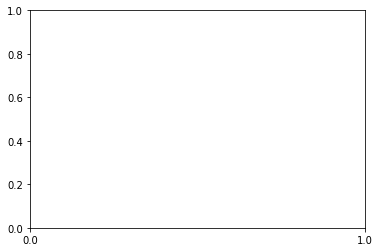

In [45]:
regr = linear_model.LinearRegression()
y = df['property_crime']
x = df[['population','murder_and_nonnegligent_manslaughter','robbery']]
#are values in X the features?
regr.fit(x, y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(x, y))